In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
ab =np.column_stack(([1,2,3], [4,5,6]))
print(ab)
print(type(ab))

[[1 4]
 [2 5]
 [3 6]]
<class 'numpy.ndarray'>


fish_length와 fish_weight를 연결하여 새로운 어레이 fish_data 생성

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [10]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
# class비율에 맞게 데이터 나누기 : stratify=(클래스)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
print(test_target)

[0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [13]:
print(kn.predict([[25,150]]))

[0.]


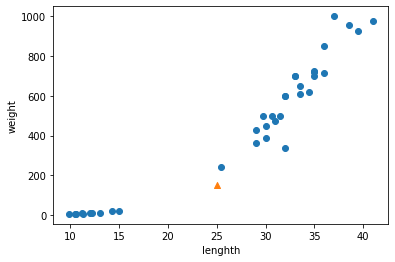

In [14]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel("lenghth")
plt.ylabel("weight")
plt.show()

In [19]:
type(kn.kneighbors)

method

In [16]:
# 25,150 주변 5개값의 거리와 인덱스 객체 설정
distances, indexes = kn.kneighbors([[25,150]])

In [17]:
print(distances, indexes)
print(type(distances))
print(type(indexes))
indexes.shape

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(1, 5)

In [ ]:
print(train_input)

[[  32.   600. ]
 [  41.   975. ]
 [  31.   500. ]
 [  11.     9.7]
 [  33.   700. ]
 [  26.3  290. ]
 [  34.5  620. ]
 [  31.5  500. ]
 [  32.   600. ]
 [  35.   700. ]
 [  38.5  920. ]
 [  12.     9.8]
 [  12.2   12.2]
 [  37.  1000. ]
 [  35.   720. ]
 [  15.    19.9]
 [   9.8    6.7]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  610. ]
 [  11.2    9.8]
 [  14.3   19.7]
 [  29.   363. ]
 [  32.   340. ]
 [  10.5    7.5]
 [  12.4   13.4]
 [  36.   850. ]
 [  29.7  450. ]
 [  29.   430. ]
 [  41.   950. ]
 [  35.   680. ]
 [  29.7  500. ]
 [  26.5  340. ]
 [  31.   475. ]
 [  30.   390. ]
 [  10.6    7. ]]


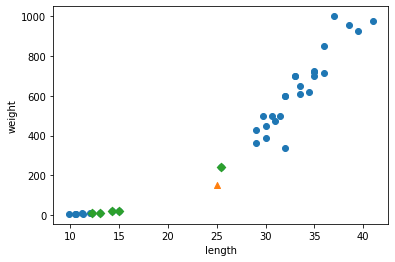

In [22]:
plt.scatter(train_input[:,0], train_input[:,1]) # x좌표:길이, y좌표:무게
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker="D") 
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

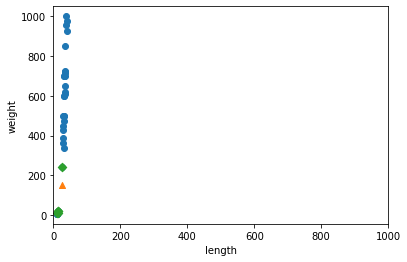

In [23]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker="D")
# x좌표의 최대값을 1000으로 만들어줌
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [24]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [25]:
print(train_input.shape)

(36, 2)


In [26]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [27]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


# 길이와 무게의 스케일이 서로 다르기 때문에 데이터 전처리를 해줘야함

In [29]:
# 원래 데이터의 형태가 다르면 계산이 안되지만 넘파이는 브로드캐스팅이 가능
train_scaled=(train_input-mean)/std

In [30]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

Text(0, 0.5, 'weight')

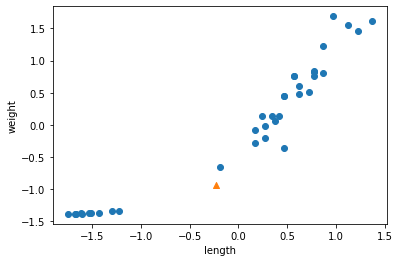

In [31]:
new = ([25,150]-mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel("length")
plt.ylabel("weight")

In [32]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [33]:
test_scaled = (test_input -mean) / std

In [34]:
kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


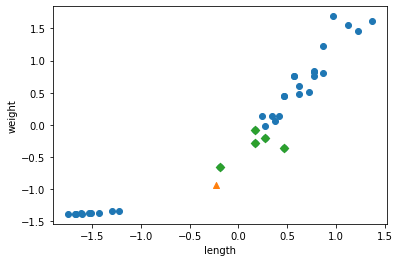

In [36]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()